## TWITTER TEXT DATA EMOTIONAL ANALYSIS USING DEEP LEARNING AND LEXICON METHODOLOGY:

In [138]:
#!pip install tensorflow

In [139]:
import pandas as pd

In [140]:
import warnings
warnings.filterwarnings("ignore")

In [141]:
#pip install text-preprocessing

In [142]:
import re

In [143]:
#Tweets review analysis:

In [144]:
data = pd.read_csv("C:\\Users\\DeepakMathew\\Downloads\\Sentimental_analysis\\SentimentalAnalysis_1-1\\twitter.csv")
data.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [145]:
data['label'].unique()

array([0, 1], dtype=int64)

In [146]:
data.shape

(31962, 3)

### Data Preprocessing:

In [147]:
import re

In [148]:
#import nltk
#nltk.downlaod('stopwords')

### Data preprocessing and cleaning:

In [149]:
#Data preprocessing and cleaning:

def preprocess_text(text):
    
    #removing tags:
    removing_tags = re.compile(r'<[^>]+>')
    text = removing_tags.sub("", text)
    
    #removing speacial chatracters:
    removing_sc = re.compile(r'[^A-Za-z0-9\s]+')
    text = removing_sc.sub('', text)
    
    #removing url:
    removing_url = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = removing_url.sub('', text)
    
    #lowercase:
    text = text.lower()
    
    return text

In [150]:
data['preprocessed_tweet'] = data['tweet'].apply(preprocess_text)
print(data['preprocessed_tweet'].head(5))

0     user when a father is dysfunctional and is so...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model   i love u take with u all the time in u...
4                 factsguide society now    motivation
Name: preprocessed_tweet, dtype: object


In [151]:
#Testing;

In [152]:
data_1 = data.head(100)
len(data_1)

100

In [153]:
data_1.keys()

Index(['id', 'label', 'tweet', 'preprocessed_tweet'], dtype='object')

### Testing sentimental analysis before tokenization:

In [154]:
preprocess_data = data_1['preprocessed_tweet'].to_csv('preprocess_data.csv', index = False)

In [155]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to apply sentiment analysis to a text
def get_sentiment_non(text):
    sentiment = analyzer.polarity_scores(str(text))
    return sentiment

# Apply sentiment analysis to the 'stemmed_data' column and store the results in a new DataFrame
sentiment_df = data_1['preprocessed_tweet'].copy()
sentiment_df.reset_index(drop=True, inplace=True)
data_1['Sentiment_of_nontoken'] = data_1['preprocessed_tweet'].apply(get_sentiment_non)

# Extract the sentiment scores into separate columns in the sentiment_df
data_1['compound_non'] = data_1['Sentiment_of_nontoken'].apply(lambda x: x['compound'])
data_1['positive_non'] = data_1['compound_non'].apply(lambda x: 1 if x > 0 else 0)
data_1['negative_non'] = data_1['compound_non'].apply(lambda x: 1 if x < 0 else 0)
data_1['neutral_non'] = data_1['compound_non'].apply(lambda x: 1 if x == 0 else 0)

sentiment_counts_non = data_1.groupby(data_1.index)[['positive_non', 'negative_non', 'neutral_non']].sum()

In [156]:
# Group by the index and sum the sentiment counts
sentiment_counts_non = data_1[['positive_non', 'negative_non', 'neutral_non']].groupby(data_1.index).sum()

# Reset the index so that the index becomes a regular column
sentiment_counts_non.reset_index(inplace=True)

# Rename the columns
sentiment_counts_non.columns = ['Index','Positive', 'Negative', 'Neutral']

# Save the DataFrame to a CSV file
sentiment_counts_non.to_csv('sentiment_counts_non.csv', index=False)

In [157]:
sentiment_counts_non

,Index,Positive,Negative,Neutral
0,0,0,1,0
1,1,1,0,0
2,2,0,0,1
3,3,1,0,0
4,4,1,0,0
...,...,...,...,...
95,95,1,0,0
96,96,1,0,0
97,97,0,0,1
98,98,0,0,1


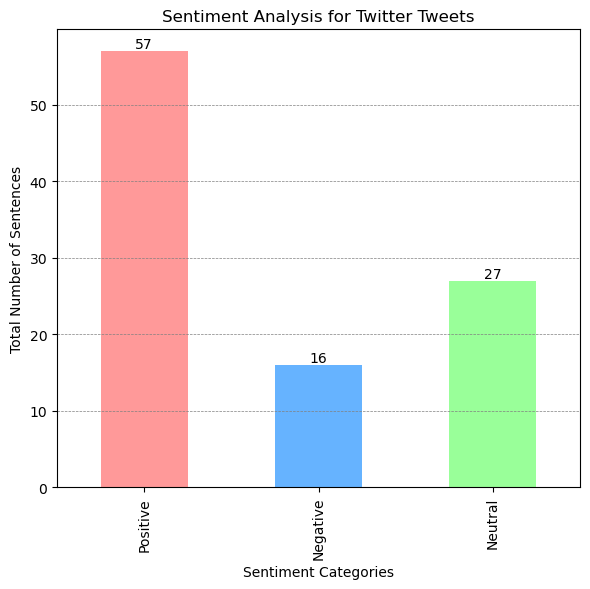

In [158]:
import matplotlib.pyplot as plt

# Set a color palette for the sentiment categories
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Set the bar width (adjust this value as needed)
bar_width = 0.5  # Narrower bars

# Calculate the total sentiment counts for each category
total_positive = sentiment_counts_non['Positive'].sum()
total_negative = sentiment_counts_non['Negative'].sum()
total_neutral = sentiment_counts_non['Neutral'].sum()

# Create a DataFrame for the total sentiment counts
total_sentiment_counts_non = pd.DataFrame({
    'Categories': ['Positive', 'Negative', 'Neutral'],
    'Counts': [total_positive, total_negative, total_neutral]
})

# Plot a grouped bar chart for total sentiment distribution
ax = total_sentiment_counts_non.plot(kind='bar', x='Categories', y='Counts', color=colors, figsize=(6, 6), width=bar_width, legend=False)

# Set labels and title
plt.title('Sentiment Analysis for Twitter Tweets')
plt.xlabel('Sentiment Categories')
plt.ylabel('Total Number of Sentences')

# Customize the grid
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

# Add labels to the bars
for index, data in enumerate(total_sentiment_counts_non['Counts']):
    plt.text(index, data, str(data), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

### Slang replacement:

In [159]:
#Replacing the slang:

import csv

# Load a sample CSV dataset with slang terms and meanings
with open('C:\\Users\\DeepakMathew\\Downloads\\Sentimental_analysis\\SentimentalAnalysis_1-1\\slang.csv', 'r') as file:
    reader = csv.reader(file)
    slang_mapping = {row[0]: row[1] for row in reader}

# Function to replace slang in a sentence
def replace_slang(sentence):
    words = sentence.split()
    replaced_words = [slang_mapping.get(word, word) for word in words]
    return ' '.join(replaced_words)

In [160]:
type(data_1['preprocessed_tweet'])

pandas.core.series.Series

In [161]:
# Apply the function to a Pandas Series of sentences
data_1['cleaned_sentence'] = data_1['preprocessed_tweet'].apply(replace_slang)
data_1['cleaned_sentence'].head(5)

0    user when a father is dysfunctional and is so ...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3        model i love u take with u all the time in ur
4                    factsguide society now motivation
Name: cleaned_sentence, dtype: object

In [162]:
#Pending: grammar mistake, meaningless sentence, spelling mistakes, multilingual text, sarcasm, ambiguity
#I feel that grammar mistake does not make much impact as we are checking the sentence based on the vector weights given to each token
#Maybe we shall find a solution to identify wrongly written sentence and rearrange texts to make it meanigful

### Lexicon: TextBlob

In [163]:
#Addressing spelling mistakes and grammatical erros involves NLP tools. We shall use TextBlob for spelling correction & POS tag:

#!pip install textblob

### Correcting the spelling and grammar:

In [164]:
from textblob import TextBlob

def correct_spelling_and_grammar(text):
    # Create a TextBlob object with the input text
    blob = TextBlob(text)
    
    # Correct spelling mistakes in the text
    corrected_text = blob.correct()
    
    # Perform part-of-speech tagging to identify and correct grammatical errors
    # This step helps in identifying and correcting grammar issues, but it may not catch all errors.
    #tagged_text = corrected_text.correct()
    
    return corrected_text

In [165]:
import time
start = time.time()

#The correct_spelling_and_grammar function returns a TextBlob object. 
#To obtain the corrected text as a string, you need to extract the string representation of the TextBlob using the str method.

data_1['spelling'] = data_1['cleaned_sentence'].apply(correct_spelling_and_grammar).apply(str)
print(data_1['spelling'].head(5))

end = time.time()
total_time = print(f'Runtime for spelling correction framework is: {end-start}')

0    user when a father is dysfunctional and is so ...
1    user user thanks for left credit i can use cau...
2                                  midday your majesty
3        model i love u take with u all the time in or
4                    factsguide society now motivation
Name: spelling, dtype: object
Runtime for spelling correction framework is: 68.67596936225891


In [166]:
data_1.keys() #column names

Index(['id', 'label', 'tweet', 'preprocessed_tweet', 'Sentiment_of_nontoken',
       'compound_non', 'positive_non', 'negative_non', 'neutral_non',
       'cleaned_sentence', 'spelling'],
      dtype='object')

In [167]:
#To tokenize sentences into words or subword units, you can use various Python libraries and tools using NLTK
#One popular library for this task is the Natural Language Toolkit (NLTK).

#!pip install nltk

### Tokenizing:

In [168]:
import nltk
#nltk.download('punkt')  # Download necessary resources

from nltk.tokenize import word_tokenize, sent_tokenize

def tokenize_sentences(text):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    #The sent_tokenize function from NLTK (Natural Language Toolkit) is used to split a given text into individual sentences. 
    #It recognizes sentence boundaries in the text based on punctuation and capitalization patterns.
    
    # Tokenize each sentence into words
    tokenized_sentences = [word_tokenize(i) for i in sentences]
    
    return tokenized_sentences

# Example usage:
input_text = "This is a sample sentence. Another sentence follows." #Text will be sentence individually and then tokenized
output_text = tokenize_sentences(input_text)
print(output_text)

[['This', 'is', 'a', 'sample', 'sentence', '.'], ['Another', 'sentence', 'follows', '.']]


In [169]:
data_1['token_data'] = data_1['spelling'].apply(tokenize_sentences)
print(data_1['token_data'].head(5))

0    [[user, when, a, father, is, dysfunctional, an...
1    [[user, user, thanks, for, left, credit, i, ca...
2                            [[midday, your, majesty]]
3    [[model, i, love, u, take, with, u, all, the, ...
4             [[factsguide, society, now, motivation]]
Name: token_data, dtype: object


In [170]:
#Above data is nested list or list of lists

### Stopwords removal using NLTK:

#To remove stop words from a text in Python, you can use libraries like NLTK (Natural Language Toolkit) or spaCy.

#NLTK

In [171]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DeepakMathew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [172]:
def remove_stopwords(words):
    # Get a set of English stop words
    stop_words = set(stopwords.words("english"))
    
    # Remove stop words from the list of words
    filtered_words = [word for word in words[0] if word not in stop_words]
    
    return filtered_words

In [173]:
data_1['data_remove_stopwords'] = [remove_stopwords(i) for i in data_1['token_data']]

print(data_1['data_remove_stopwords'].head(5))

0    [user, father, dysfunctional, selfish, drags, ...
1    [user, user, thanks, left, credit, use, cause,...
2                                    [midday, majesty]
3                      [model, love, u, take, u, time]
4                    [factsguide, society, motivation]
Name: data_remove_stopwords, dtype: object


### Lemmatization and Stemming:

In [174]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [175]:
# Initialize the NLTK lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Function to get WordNet POS tags for lemmatization
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Function to lemmatize a single word
def lemmatize_word(word):
    return lemmatizer.lemmatize(word, get_wordnet_pos(word))

# Function to stem a single word
def stem_word(word):
    return stemmer.stem(word)

In [176]:
# Apply lemmatization and stemming functions to the DataFrame element-wise
data_1['lemmatized_data'] = data_1['data_remove_stopwords'].apply(lambda words: [lemmatize_word(word) for word in words])
data_1['stemmed_data'] = data_1['data_remove_stopwords'].apply(lambda words: [stem_word(word) for word in words])

# Display the DataFrame
print(data_1.head(5))

   id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                  preprocessed_tweet  \
0   user when a father is dysfunctional and is so...   
1  user user thanks for lyft credit i cant use ca...   
2                                bihday your majesty   
3  model   i love u take with u all the time in u...   
4               factsguide society now    motivation   

                               Sentiment_of_nontoken  compound_non  \
0  {'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'comp...       -0.8296   
1  {'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'comp...        0.6705   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound.

In [177]:
data_1.keys()

Index(['id', 'label', 'tweet', 'preprocessed_tweet', 'Sentiment_of_nontoken',
       'compound_non', 'positive_non', 'negative_non', 'neutral_non',
       'cleaned_sentence', 'spelling', 'token_data', 'data_remove_stopwords',
       'lemmatized_data', 'stemmed_data'],
      dtype='object')

In [178]:
data_1.drop(['preprocessed_tweet', 'cleaned_sentence', 'spelling', 'token_data', 'data_remove_stopwords'], axis = 1, inplace =True)
data_1.keys()

Index(['id', 'label', 'tweet', 'Sentiment_of_nontoken', 'compound_non',
       'positive_non', 'negative_non', 'neutral_non', 'lemmatized_data',
       'stemmed_data'],
      dtype='object')

In [179]:
drop_list= ['id', 'label', 'tweet']
data_1.drop(columns = drop_list, inplace = True, axis=1)
data_1.shape

(100, 7)

In [180]:
data_1.keys()

Index(['Sentiment_of_nontoken', 'compound_non', 'positive_non', 'negative_non',
       'neutral_non', 'lemmatized_data', 'stemmed_data'],
      dtype='object')

In [181]:
#TESTING FOR THE UNIQUE WORDS AND CORRECTING THE SPELLING:

In [182]:
# Flatten the list of lists into a single list and printing the unique words:
flat_words_list = [word for sentence in data_1['stemmed_data'] for word in sentence]

# Get unique words from the flattened list
unique_words = list(set(flat_words_list))

# Print the unique words
print(unique_words)

['natalya', 'awhil', 'share', 'disabl', 'scourg', 'remov', 'morn', 'thecov', 'piano', 'bar', 'someth', 'squad', 'ride', 'cheer', 'terrorist', 'yugyoem', 'media', 'oil', 'direct', 'basilicabotanica', 'xenophobia', 'pm', 'wed', 'oxygen', 'master', 'abc2020', 'caus', 'offer', 'coneofsham', 'summertim', 'mediat', 'peac', 'edwardsvil', 'sake', 'social', 'begin', 'folk', 'journey', 'new', '05', 'venusexchang', 'receiv', 'includ', 'reread', 'unbeliev', 'solo', 'turkey', '2m2h', 'hello', 'heabreak', 'see', 'ident', 'never', 'tonight', 'hump', 'centuri', 'pulseclub', 'scot', 'fan', 'laugh', 'good', 'wheresallthenaturalphoto', 'race', 'help', 'panel', 'disneygatorattack', 'australia', 'bliss', 'vote', 'organ', 'away', 'positivevib', 'talk', 'presidenti', 'van', 'enoughisenough', 'nake', 'pennsylvania', 'zpamdelacruz', 'via', 'revolutionschool', 'world', 'think', 'heal', 'cours', 'night', 'use', 'sad', 'famili', 'brow', 'selfish', 'test', 'fashion', 'badmonday', 'channel', 'driveway', 'campfir', 

### Sentiment Intensity Analyzer:

In [183]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to apply sentiment analysis to a text
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(str(text))
    return sentiment

# Apply sentiment analysis to the 'stemmed_data' column and store the results in a new DataFrame
sentiment_df = data_1['stemmed_data'].copy()
sentiment_df.reset_index(drop=True, inplace=True)
data_1['Sentiment'] = data_1['stemmed_data'].apply(get_sentiment)

# Extract the sentiment scores into separate columns in the sentiment_df
data_1['compound'] = data_1['Sentiment'].apply(lambda x: x['compound'])
data_1['positive'] = data_1['compound'].apply(lambda x: 1 if x > 0 else 0)
data_1['negative'] = data_1['compound'].apply(lambda x: 1 if x < 0 else 0)
data_1['neutral'] = data_1['compound'].apply(lambda x: 1 if x == 0 else 0)

sentiment_counts = data_1.groupby(data_1.index)[['positive', 'negative', 'neutral']].sum()

In [195]:
sentiment_counts

,Index,Positive,Negative,Neutral
0,0,0,0,1
1,1,0,0,1
2,2,0,0,1
3,3,0,0,1
4,4,0,0,1
...,...,...,...,...
95,95,0,0,1
96,96,0,0,1
97,97,0,0,1
98,98,0,0,1


In [184]:
data_1['Sentiment']

# Create a DataFrame with the unique words
unique_score = data_1['Sentiment']

# Save the DataFrame to a CSV file
unique_score.to_csv('unique_score_1.csv', index=False)

In [185]:
# #DONT CONSIDER THIS ONE: USE THIS ONE FOR NON TOKENIZED INPUT:

# import pandas as pd
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# analyzer = SentimentIntensityAnalyzer()

# # Function to apply sentiment analysis to a text
# def get_sentiment(text):
#     sentiment = analyzer.polarity_scores(str(text))
#     return sentiment

# # Convert lists in 'stemmed_data' to strings
# data_1['stemmed_data_str'] = data_1['stemmed_data'].apply(lambda x: ' '.join(map(str, x)))

# # Apply sentiment analysis to the 'stemmed_data_str' column
# data_1['Sentiment'] = data_1['stemmed_data_str'].apply(get_sentiment)

# # Extract the sentiment scores into separate columns
# data_1['compound'] = data_1['Sentiment'].apply(lambda x: x['compound'])
# data_1['positive'] = data_1['compound'].apply(lambda x: 1 if x > 0 else 0)
# data_1['negative'] = data_1['compound'].apply(lambda x: 1 if x < 0 else 0)
# data_1['neutral'] = data_1['compound'].apply(lambda x: 1 if x == 0 else 0)

# # Group by 'stemmed_data_str' and sum the sentiment counts

# sentiment_counts = data_1.groupby('stemmed_data_str')[['positive', 'negative', 'neutral']].sum()

In [186]:
# Group by the index and sum the sentiment counts
sentiment_counts = data_1[['positive', 'negative', 'neutral']].groupby(data_1.index).sum()

# Reset the index so that the index becomes a regular column
sentiment_counts.reset_index(inplace=True)

# Rename the columns
sentiment_counts.columns = ['Index', 'Positive', 'Negative', 'Neutral']

# Save the DataFrame to a CSV file
sentiment_counts.to_csv('sentiment_counts.csv', index=False)

In [187]:
stemmed_data = data_1['stemmed_data']
stemmed_data.to_csv('stemmed_data.csv', index = False)

In [188]:
#One thing which we need to check is, if we write in capital such as 'HELLO!', does it make an impact:

positive_total = data_1['positive'].sum()
negative_total = data_1['negative'].sum()
neutral_total = data_1['neutral'].sum()

print("Total Positive:", positive_total)
print("Total Negative:", negative_total)
print("Total Neutral:", neutral_total)

Total Positive: 0
Total Negative: 0
Total Neutral: 100


### Data Visulaization and plotting:

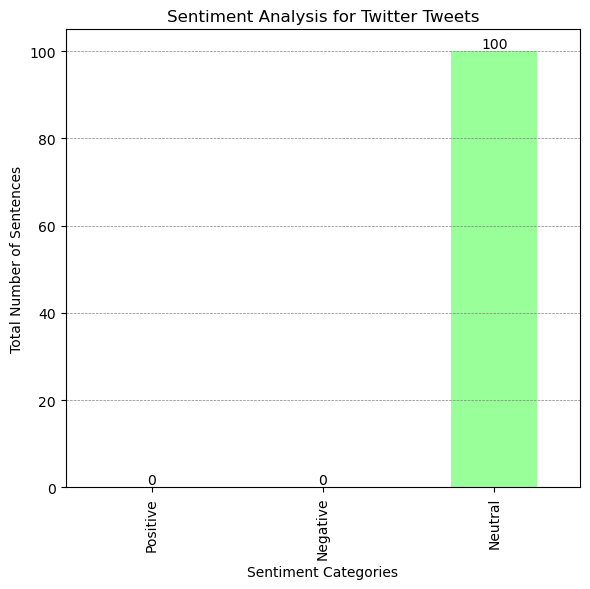

In [189]:
import matplotlib.pyplot as plt

# Set a color palette for the sentiment categories
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Set the bar width (adjust this value as needed)
bar_width = 0.5  # Narrower bars

# Calculate the total sentiment counts for each category
total_positive = sentiment_counts['Positive'].sum()
total_negative = sentiment_counts['Negative'].sum()
total_neutral = sentiment_counts['Neutral'].sum()

# Create a DataFrame for the total sentiment counts
total_sentiment_counts = pd.DataFrame({
    'Categories': ['Positive', 'Negative', 'Neutral'],
    'Counts': [total_positive, total_negative, total_neutral]
})

# Plot a grouped bar chart for total sentiment distribution
ax = total_sentiment_counts.plot(kind='bar', x='Categories', y='Counts', color=colors, figsize=(6, 6), width=bar_width, legend=False)

# Set labels and title
plt.title('Sentiment Analysis for Twitter Tweets')
plt.xlabel('Sentiment Categories')
plt.ylabel('Total Number of Sentences')

# Customize the grid
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

# Add labels to the bars
for index, data in enumerate(total_sentiment_counts['Counts']):
    plt.text(index, data, str(data), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [190]:
#Checking whether the analysis is correct or not.....

In [191]:
#We are going to list out the unique words - done
#We will save it as a text data - csv
#We will add these words to the excel with slangs
#We will run the replacement function
#Continue with the vector data

In [192]:
#Checking the count of words:

# Combine all the lists of words into one list
all_words = [word for sublist in data_1['stemmed_data'] for word in sublist]

# Create a Series to count the words
word_count = pd.Series(all_words).value_counts()

# Print the word count
len(word_count)

531

In [193]:
# Flatten the list of lists
flat_output_text = [word for sentence in data_1['stemmed_data'] for word in sentence]

# Get unique elements
unique_words = list(set(flat_output_text))

# Create a new DataFrame or Series with the unique words
unique_words_series = pd.Series(unique_words, name='unique_words')

# Print or use unique_words_series as needed
print(unique_words_series)

0        natalya
1          awhil
2          share
3         disabl
4         scourg
         ...    
526         feel
527       garden
528         user
529      amarind
530    photoshop
Name: unique_words, Length: 531, dtype: object


# TBC

### Text Vectorization:

### Load Pre-trained Word Embeddings (Word2Vec or GloVe):

In [198]:
import numpy as np

# Load pre-trained GloVe vectors into a dictionary
glove_embeddings = {}
embedding_file = 'C:\\Users\\DeepakMathew\\Downloads\\Sentimental_analysis\\SentimentalAnalysis_1-1\\glove.6B.300d.txt'  # Change this to your file path
with open(embedding_file, 'r', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        glove_embeddings[word] = vector

In [199]:
# Tokenize Your Sentences:

# You already have your sentences tokenized into words. If you have a list of sentences as in your example, you can proceed directly.

In [200]:
# Convert words into vector representations
def words_to_vectors(words, embeddings):
    vectorized_words = [embeddings[word] if word in embeddings else np.zeros(embeddings['the'].shape) for word in words]
    return vectorized_words

# Apply the 'words_to_vectors' function to your data
data_1['vectorized_data'] = [words_to_vectors(sentence, glove_embeddings) for sentence in data_1['lemmatized_data']]
first_row_data = data_1['vectorized_data'].iloc[0]
len(data_1['vectorized_data'])

100

In [201]:
first_row_data = data_1['vectorized_data']

# Assuming you have a pandas Series 'first_row_data'
first_value = first_row_data.iloc[0]

# Convert the list to a string representation
first_value_str = str(first_value)

file_path = "first_row_data.txt"  # The path to your text file
with open(file_path, "w") as file:
    file.write(first_value_str)

In [202]:
first_row_data

0     [[-1.1169, 0.28015, 0.12901, -0.85792, 0.18844...
1     [[-1.1169, 0.28015, 0.12901, -0.85792, 0.18844...
2     [[-0.20754, -0.51705, 0.38977, 0.4795, -0.2305...
3     [[-0.53858, 0.486, -0.043436, -0.40952, 0.1588...
4     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
                            ...                        
95    [[-1.1169, 0.28015, 0.12901, -0.85792, 0.18844...
96    [[-0.53858, 0.486, -0.043436, -0.40952, 0.1588...
97    [[-0.57503, 0.072415, -0.63673, 0.34177, -0.08...
98    [[-0.24263, -0.068464, -0.073068, 0.25641, -0....
99    [[0.62879, 0.092931, 0.11965, 0.25851, -0.1581...
Name: vectorized_data, Length: 100, dtype: object

In [203]:
#pip install tensorflow

In [204]:
from keras.preprocessing.sequence import pad_sequences

# Assuming you have 'vectorized_data' from the previous step
# 'vectorized_data' is a list of sentences, each containing word vectors

# Pad or truncate sequences to a fixed length (e.g., max_len)
max_len = 20  # Set your desired sequence length

# Pad or truncate each sentence within the sequences
data_1['padded_sequences'] = [pad_sequences(sentence, maxlen=max_len, dtype='float32', padding='post', truncating='post') for sentence in data_1['vectorized_data']]

In [205]:
data_1.keys()

Index(['Sentiment_of_nontoken', 'compound_non', 'positive_non', 'negative_non',
       'neutral_non', 'lemmatized_data', 'stemmed_data', 'Sentiment',
       'compound', 'positive', 'negative', 'neutral', 'vectorized_data',
       'padded_sequences'],
      dtype='object')

In [206]:
data_1['padded_sequences'].head(1)

0    [[-1.1169, 0.28015, 0.12901, -0.85792, 0.18844...
Name: padded_sequences, dtype: object

In [207]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Iterate through the DataFrame and assign sentiment labels
sentiment_labels = []

for sequence in data_1['padded_sequences']:
    # Convert the NumPy array to a list of strings
    sentence = [str(word) for word in sequence]
    
    # Get sentiment scores
    sentiment_scores = analyzer.polarity_scores(' '.join(sentence))
    
    # Determine the sentiment label based on the compound score
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.01:
        sentiment_label = "positive"
    elif compound_score <= -0.01:
        sentiment_label = "negative"
    else:
        sentiment_label = "neutral"
    
    sentiment_labels.append(sentiment_label)

# Create a new column 'sentiment' in the DataFrame
data_1['sentiment'] = sentiment_labels

In [208]:
data_1['sentiment'].values

array(['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 

In [209]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Iterate through the DataFrame and assign sentiment labels
sentiment_labels = []

for sequence in data_1['padded_sequences']:
    # Convert the NumPy array to a list of strings
    sentence = [str(word) for word in sequence]
    
    # Get sentiment scores
    sentiment_scores = analyzer.polarity_scores(' '.join(sentence))
    
    # Determine the sentiment label based on the compound score
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        sentiment_label = "positive"
    elif compound_score <= -0.05:
        sentiment_label = "negative"
    else:
        sentiment_label = "neutral"
    
    sentiment_labels.append(sentiment_label)

# Create a new column 'sentiment' in the DataFrame
data_1['sentiment'] = sentiment_labels

In [210]:
sentiment_scores['compound']

0.0